In [70]:
import numpy as np
import matplotlib.pyplot as plt

In [71]:
T =2.
N = 1000
n = 10
del_T = T/n

In [72]:
# Simulation of Browian mouvements
def simu_W(N,T,n):
    del_T = T/n
    Z = np.random.randn(N, n)*np.sqrt(del_T) # increments
    W = np.cumsum(Z,axis = 1)
    W = np.concatenate((np.zeros((N,1)), W), axis =1) # add one column at t = 0
    return W

In [73]:
# Functions needed for question 1
def simu_IJK(N,T,n):
    W = simu_W(N,T,n)
    I = np.sum(W[:,0:-1]*(W[:,1:] - W[:,0:-1]), axis = 1)
    J = np.sum(W[:,1:]*(W[:,1:] - W[:,0:-1]), axis = 1)
    K = np.sum((W[:,1:]+W[:,0:-1])/2.*(W[:,1:] - W[:,0:-1]), axis = 1)

    WT_I = 0.5*W[:,-1]*W[:,-1] - I
    WT_J = 0.5*W[:,-1]*W[:,-1] - J
    WT_K = 0.5*W[:,-1]*W[:,-1] - K
    
    return WT_I,WT_J,WT_K

def mean_std(N,T,n, flag_print = False):
    # calculate the mean and std of three variables of question 1
    WT_I,WT_J,WT_K = simu_IJK(N,T,n)
    mean_WT_I = np.mean(WT_I)
    mean_WT_J = np.mean(WT_J)
    mean_WT_K = np.mean(WT_K)
    std_WT_I = np.std(WT_I)
    std_WT_J = np.std(WT_J)
    std_WT_K = np.std(WT_K)
    
    if flag_print:
        print("The sample mean of 1/2*W_T^2 - I_n: {}".format(mean_WT_I))
        print("The sample mean of 1/2*W_T^2 - J_n: {}".format(mean_WT_J))
        print("The sample mean of 1/2*W_T^2 - K_n: {}".format(mean_WT_K))
    
    return mean_WT_I,mean_WT_J,mean_WT_K,std_WT_I,std_WT_J,std_WT_K
    
_ = mean_std(N,T,n, True)

The sample mean of 1/2*W_T^2 - I_n: 0.981551990530944
The sample mean of 1/2*W_T^2 - J_n: -0.9815519905309441
The sample mean of 1/2*W_T^2 - K_n: -6.385728310824624e-18


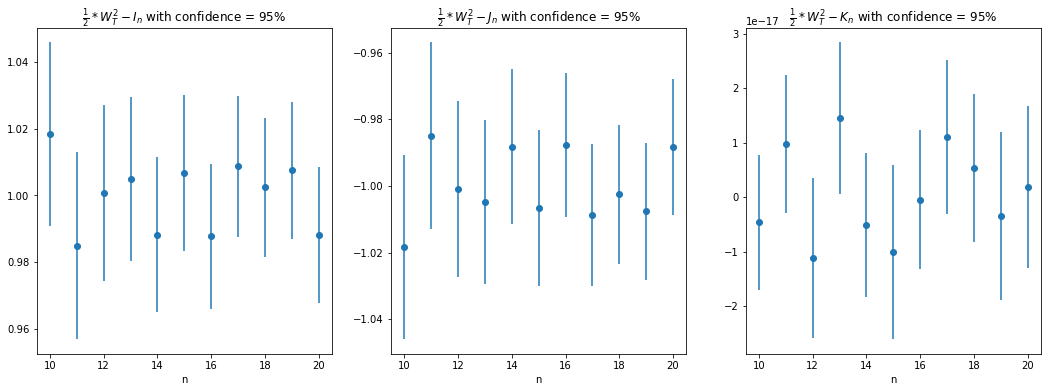

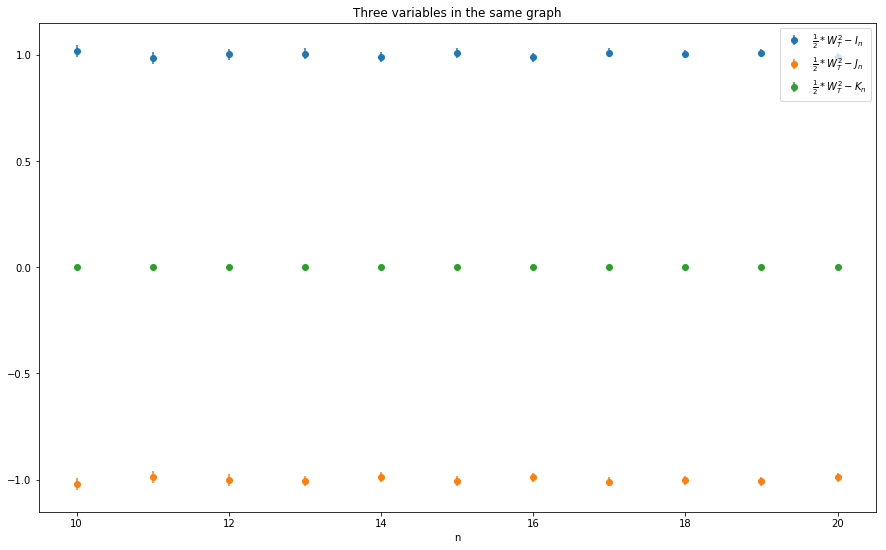

In [74]:
# Question 1
# calculate the mean and confidence intervals for three variables with different n
nn = np.arange(10,21)
means = [[],[],[]]
intervals = [[],[],[]]
for i in nn:
    mean_WT_I,mean_WT_J,mean_WT_K,std_WT_I,std_WT_J,std_WT_K = mean_std(N,T,i)
    means[0].append(mean_WT_I)
    means[1].append(mean_WT_J)
    means[2].append(mean_WT_K)
    intervals[0].append(std_WT_I/np.sqrt(N)*1.96)
    intervals[1].append(std_WT_J/np.sqrt(N)*1.96)
    intervals[2].append(std_WT_K/np.sqrt(N)*1.96)

#plots
plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,3,1)
plt.errorbar(x=nn, y=means[0],yerr=intervals[0], fmt = 'o')
ax1.set_title(r"$\frac{1}{2}*W_T^2 - I_n$ with confidence = 95%")
ax1.set_xlabel("n")
ax2 = plt.subplot(1,3,2)
plt.errorbar(x=nn, y=means[1],yerr=intervals[1], fmt = 'o')
ax2.set_title(r"$\frac{1}{2}*W_T^2 - J_n$ with confidence = 95%")
ax2.set_xlabel("n")
ax3 = plt.subplot(1,3,3)
plt.errorbar(x=nn, y=means[2],yerr=intervals[2], fmt = 'o')
ax3.set_title(r"$\frac{1}{2}*W_T^2 - K_n$ with confidence = 95%")
ax3.set_xlabel("n")
plt.show()

plt.figure(figsize=(15,9))
plt.errorbar(x=nn, y=means[0],yerr=intervals[0], fmt = 'o', label = r"$\frac{1}{2}*W_T^2 - I_n$" )
plt.errorbar(x=nn, y=means[1],yerr=intervals[1], fmt = 'o', label = r"$\frac{1}{2}*W_T^2 - J_n$")
plt.errorbar(x=nn, y=means[2],yerr=intervals[2], fmt = 'o', label = r"$\frac{1}{2}*W_T^2 - K_n$")
plt.title("Three variables in the same graph")
plt.xlabel("n")
plt.legend(loc = "best")
plt.show()

# Conclusion

As I have demonstrated in the pdf file, the third variable(0.5*W_T^2 - K) should be 0. The mean of 0.5*W_T^2 - I should be 1 and the mean of 0.5*W_T^2 - J should be -1.

In [75]:
# Functions needed for question 2
def simu_ABC(N,T,n):
    # three variables A,B,C
    W = simu_W(N,T,n)
    del_t = T/n
    t = np.arange(n+1)*del_t
    
    A = np.sum(np.exp(t[0:-1])*(W[:,1:] - W[:,0:-1]), axis = 1)
    B = np.sum(np.exp(t[1:])*(W[:,1:] - W[:,0:-1]), axis = 1)
    C = np.sum(np.exp((t[1:]+t[0:-1])/2)*(W[:,1:] - W[:,0:-1]), axis = 1)

    WT_A = 0.5*W[:,-1]*W[:,-1] - A
    WT_B = 0.5*W[:,-1]*W[:,-1] - B
    WT_C = 0.5*W[:,-1]*W[:,-1] - C
    
    return WT_A,WT_B,WT_C

def mean_std_ABC(N,T,n, flag_print = False):
     # calculate the mean and std of three variables of question 2.
    WT_A,WT_B,WT_C = simu_ABC(N,T,n)
    mean_WT_A = np.mean(WT_A)
    mean_WT_B = np.mean(WT_B)
    mean_WT_C = np.mean(WT_C)
    std_WT_A = np.std(WT_A)
    std_WT_B = np.std(WT_B)
    std_WT_C = np.std(WT_C)
    
    if flag_print:
        print("The sample mean of 1/2*W_T^2 - A_n: {}".format(mean_WT_A))
        print("The sample mean of 1/2*W_T^2 - B_n: {}".format(mean_WT_B))
        print("The sample mean of 1/2*W_T^2 - C_n: {}".format(mean_WT_C))
    
    return mean_WT_A,mean_WT_B,mean_WT_C,std_WT_A,std_WT_B,std_WT_C

_ = mean_std_ABC(N,T,n, True)

The sample mean of 1/2*W_T^2 - A_n: 1.4331153715586475
The sample mean of 1/2*W_T^2 - B_n: 1.5086875553010415
The sample mean of 1/2*W_T^2 - C_n: 1.4690137316839504


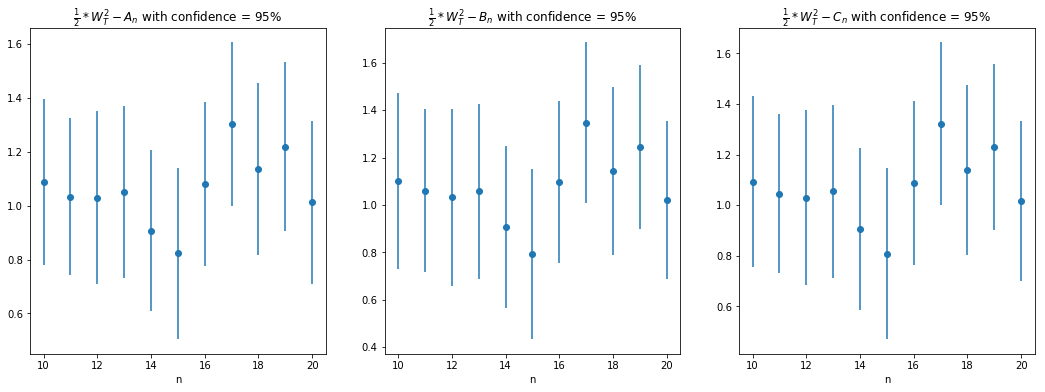

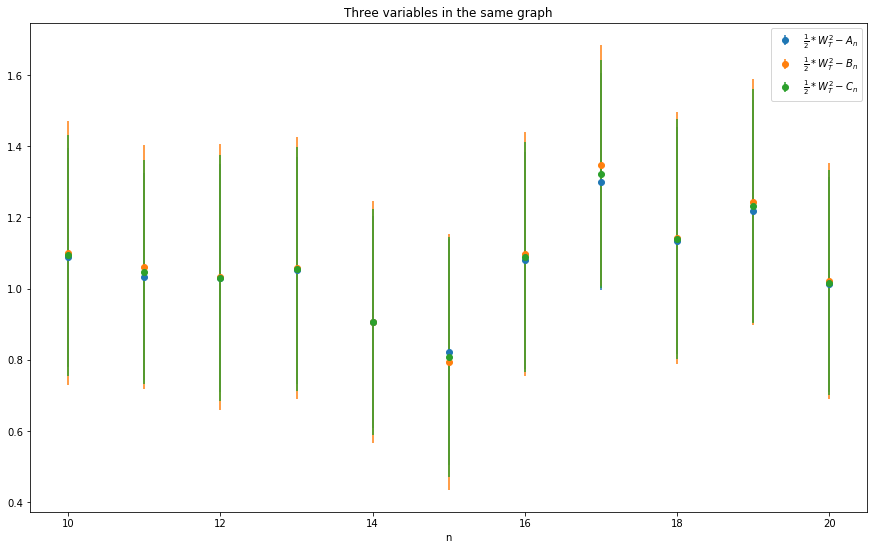

In [76]:
# Question 2
# calculate the mean and confidence intervals for three variables with different n
nn = np.arange(10,21)
means_ABC = [[],[],[]]
intervals_ABC = [[],[],[]]
for i in nn:
    mean_WT_A,mean_WT_B,mean_WT_C,std_WT_A,std_WT_B,std_WT_C = mean_std_ABC(N,T,i)
    means_ABC[0].append(mean_WT_A)
    means_ABC[1].append(mean_WT_B)
    means_ABC[2].append(mean_WT_C)
    intervals_ABC[0].append(std_WT_A/np.sqrt(N)*1.96)
    intervals_ABC[1].append(std_WT_B/np.sqrt(N)*1.96)
    intervals_ABC[2].append(std_WT_C/np.sqrt(N)*1.96)
    
plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,3,1)
plt.errorbar(x=nn, y=means_ABC[0],yerr=intervals_ABC[0], fmt = 'o')
ax1.set_title(r"$\frac{1}{2}*W_T^2 - A_n$ with confidence = 95%")
ax1.set_xlabel("n")
ax2 = plt.subplot(1,3,2)
plt.errorbar(x=nn, y=means_ABC[1],yerr=intervals_ABC[1], fmt = 'o')
ax2.set_title(r"$\frac{1}{2}*W_T^2 - B_n$ with confidence = 95%")
ax2.set_xlabel("n")
ax3 = plt.subplot(1,3,3)
plt.errorbar(x=nn, y=means_ABC[2],yerr=intervals_ABC[2], fmt = 'o')
ax3.set_title(r"$\frac{1}{2}*W_T^2 - C_n$ with confidence = 95%")
ax3.set_xlabel("n")
plt.show()

plt.figure(figsize=(15,9))
plt.errorbar(x=nn, y=means_ABC[0],yerr=intervals_ABC[0], fmt = 'o', label = r"$\frac{1}{2}*W_T^2 - A_n$" )
plt.errorbar(x=nn, y=means_ABC[1],yerr=intervals_ABC[1], fmt = 'o', label = r"$\frac{1}{2}*W_T^2 - B_n$")
plt.errorbar(x=nn, y=means_ABC[2],yerr=intervals_ABC[2], fmt = 'o', label = r"$\frac{1}{2}*W_T^2 - C_n$")
plt.title("Three variables in the same graph")
plt.xlabel("n")
plt.legend(loc = "best")
plt.show()

# Conclusion 2
As demonstrated in the pdf file, the mean of three variables should be 0. The simulation confirmed this proof.

In [77]:
# Simulation of A_n in question 3
def Q3(N,T,n):
    W = simu_W(N,T,n)
    A_n = np.sin(W[:,-1]) + 0.5/n*np.sum(np.sin(W[:,0:-1]), axis =1)
    mean_An = np.mean(A_n)
    std_An = np.std(A_n)
    
    return mean_An, std_An


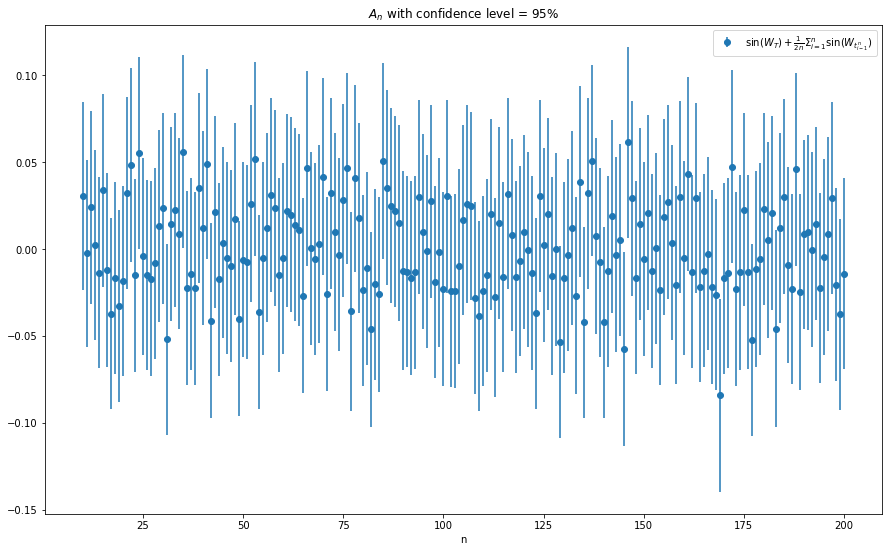

In [78]:
# calculate the mean and confidence interval with different n
N=1000
nn = np.arange(10,201)
means_Q3 = []
intervals_Q3 = []
for i in nn:
    mean_An, std_An = Q3(N,T,i)
    means_Q3.append(mean_An)
    intervals_Q3.append(std_An/np.sqrt(N)*1.96)

#plots
plt.figure(figsize=(15,9))
plt.errorbar(x=nn, y=means_Q3,yerr=intervals_Q3, fmt = 'o', label = 
             r"$\sin{(W_T)} + \frac{1}{2n}\Sigma^n_{i=1}\sin(W_{t^n_{i-1}})$")
plt.title(r"$A_n$ with confidence level = 95%")
plt.xlabel("n")
plt.legend(loc = "best")
plt.show()

# Conclusion 3
As demonstrated in the pdf file, the mean of A_n should be 0 which is confirmed by simulations.